In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# loading the csv data to a Pandas DataFrame
bapok_data = pd.read_csv('../harga_bapokting_surabaya.csv')

In [3]:
# print first 5 rows in the dataframe
bapok_data.head()

,Tanggal,Beras Premium,Beras Medium,Beras SPHP,Jagung Tk Peternak,Kedelai Biji Kering (Impor),Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Cabai Merah Besar,...,Minyak Goreng Curah,Tepung Terigu (Curah),Minyakita,Tepung Terigu Kemasan,Ikan Kembung,Ikan Tongkol,Ikan Bandeng,Garam Konsumsi,Daging Kerbau Beku (Impor),Daging Kerbau Segar (Lokal)
0,2024-01-01,14000,11950,0,6000,15000,28500,36000,41000,0,...,15500,10000,0,12500,35000,35000,36000,10000,0,0
1,2024-01-02,14000,11950,0,6000,15000,28500,36500,55000,0,...,15500,10000,0,12500,35000,35000,36000,10000,0,0
2,2024-01-03,14000,11950,0,6000,15000,31000,37000,51000,0,...,15500,10000,0,12500,35000,35000,36000,10000,0,0
3,2024-01-04,14000,12450,0,6000,13935,28870,37495,47920,0,...,15245,10000,0,11000,35000,35000,33890,10000,0,0
4,2024-01-05,14000,11950,0,6000,15000,31500,37000,43500,0,...,15500,10000,0,12500,35000,35000,36000,10000,0,0


In [4]:
# print last 5 rows of the dataframe
bapok_data.tail()

,Tanggal,Beras Premium,Beras Medium,Beras SPHP,Jagung Tk Peternak,Kedelai Biji Kering (Impor),Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Cabai Merah Besar,...,Minyak Goreng Curah,Tepung Terigu (Curah),Minyakita,Tepung Terigu Kemasan,Ikan Kembung,Ikan Tongkol,Ikan Bandeng,Garam Konsumsi,Daging Kerbau Beku (Impor),Daging Kerbau Segar (Lokal)
480,2025-04-25,15375,13000,0,0,0,39222,42667,41111,35556,...,19500,9750,15925,11750,25000,31500,33571,10000,0,0
481,2025-04-26,15375,13000,0,0,0,38333,42667,39444,34556,...,19500,9750,15925,11750,25083,31500,33571,10000,0,0
482,2025-04-27,15375,13000,0,0,0,39000,42667,39667,34444,...,19500,9750,15925,11750,25083,31583,33643,10000,0,0
483,2025-04-28,15375,13000,0,0,0,37222,42667,38556,34000,...,19500,9750,15925,11750,25083,31583,33571,10000,0,0
484,2025-04-29,15000,13000,0,0,0,30667,38000,20000,26667,...,18667,9667,16000,11333,27000,28000,27000,10000,0,0


In [5]:
columns_to_drop = [
    "Beras SPHP",
    "Jagung Tk Peternak",
    "Kedelai Biji Kering (Impor)",
    "Daging Sapi Murni",
    "Ikan Kembung",
    "Ikan Tongkol",
    "Ikan Bandeng",
    "Garam Konsumsi",
    "Daging Kerbau Beku (Impor)",
    "Daging Kerbau Segar (Lokal)"
]

# Hapus kolom-kolom tersebut jika ada dalam DataFrame
bapok_data = bapok_data.drop(columns=[col for col in columns_to_drop if col in bapok_data.columns])

In [6]:
# number of rows and columns
bapok_data.shape

(485, 16)

In [7]:
# getting some basic informations about the data
bapok_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Tanggal                485 non-null    object
 1   Beras Premium          485 non-null    int64 
 2   Beras Medium           485 non-null    int64 
 3   Bawang Merah           485 non-null    int64 
 4   Bawang Putih Bonggol   485 non-null    int64 
 5   Cabai Merah Keriting   485 non-null    int64 
 6   Cabai Merah Besar      485 non-null    int64 
 7   Cabai Rawit Merah      485 non-null    int64 
 8   Daging Ayam Ras        485 non-null    int64 
 9   Telur Ayam Ras         485 non-null    int64 
 10  Gula Konsumsi          485 non-null    int64 
 11  Minyak Goreng Kemasan  485 non-null    int64 
 12  Minyak Goreng Curah    485 non-null    int64 
 13  Tepung Terigu (Curah)  485 non-null    int64 
 14  Minyakita              485 non-null    int64 
 15  Tepung Terigu Kemasan  

In [8]:
# checking the number of missing values
bapok_data.isnull().sum()

Tanggal                  0
Beras Premium            0
Beras Medium             0
Bawang Merah             0
Bawang Putih Bonggol     0
Cabai Merah Keriting     0
Cabai Merah Besar        0
Cabai Rawit Merah        0
Daging Ayam Ras          0
Telur Ayam Ras           0
Gula Konsumsi            0
Minyak Goreng Kemasan    0
Minyak Goreng Curah      0
Tepung Terigu (Curah)    0
Minyakita                0
Tepung Terigu Kemasan    0
dtype: int64

In [9]:
# Mengecek jumlah nilai 0 atau NaN per kolom
((bapok_data == 0) | (bapok_data.isnull())).sum()

Tanggal                    0
Beras Premium             19
Beras Medium              19
Bawang Merah              19
Bawang Putih Bonggol      19
Cabai Merah Keriting      19
Cabai Merah Besar        373
Cabai Rawit Merah         19
Daging Ayam Ras           19
Telur Ayam Ras            19
Gula Konsumsi             19
Minyak Goreng Kemasan     19
Minyak Goreng Curah       19
Tepung Terigu (Curah)     19
Minyakita                373
Tepung Terigu Kemasan     19
dtype: int64

In [10]:
# Hitung persentase nilai 0 untuk setiap kolom
zero_percentage = (bapok_data == 0).sum() / len(bapok_data)

# Tampilkan persentase nilai 0
print("Persentase nilai 0 per kolom:")
print(zero_percentage)

# Tentukan threshold, misalnya 30%
threshold = 0.3

# Dapatkan nama kolom yang lebih dari threshold
cols_to_drop = zero_percentage[zero_percentage > threshold].index

# Drop kolom-kolom tersebut
bapok_data = bapok_data.drop(columns=cols_to_drop)

# Tampilkan hasil
print(f"\nKolom yang dihapus (>{int(threshold * 100)}% nilai 0):")
print(list(cols_to_drop))


Persentase nilai 0 per kolom:
Tanggal                  0.000000
Beras Premium            0.039175
Beras Medium             0.039175
Bawang Merah             0.039175
Bawang Putih Bonggol     0.039175
Cabai Merah Keriting     0.039175
Cabai Merah Besar        0.769072
Cabai Rawit Merah        0.039175
Daging Ayam Ras          0.039175
Telur Ayam Ras           0.039175
Gula Konsumsi            0.039175
Minyak Goreng Kemasan    0.039175
Minyak Goreng Curah      0.039175
Tepung Terigu (Curah)    0.039175
Minyakita                0.769072
Tepung Terigu Kemasan    0.039175
dtype: float64

Kolom yang dihapus (>30% nilai 0):
['Cabai Merah Besar', 'Minyakita']


In [11]:
# Mengecek jumlah nilai 0 atau NaN per kolom
((bapok_data == 0) | (bapok_data.isnull())).sum()

Tanggal                   0
Beras Premium            19
Beras Medium             19
Bawang Merah             19
Bawang Putih Bonggol     19
Cabai Merah Keriting     19
Cabai Rawit Merah        19
Daging Ayam Ras          19
Telur Ayam Ras           19
Gula Konsumsi            19
Minyak Goreng Kemasan    19
Minyak Goreng Curah      19
Tepung Terigu (Curah)    19
Tepung Terigu Kemasan    19
dtype: int64

In [12]:
import pandas as pd

# Salin data bersih untuk diproses
df = bapok_data.copy()

# Pastikan kolom Tanggal dalam format datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Tambahkan kolom bantu: bulan dan tahun
df['Bulan'] = df['Tanggal'].dt.month
df['Tahun'] = df['Tanggal'].dt.year

# Loop setiap kolom (kecuali kolom waktu)
for col in df.columns:
    if col in ['Tanggal', 'Bulan', 'Tahun']:
        continue
    
    # Temukan indeks baris yang nilainya 0
    zero_rows = df[df[col] == 0]
    
    for idx in zero_rows.index:
        tahun = df.loc[idx, 'Tahun']
        bulan = df.loc[idx, 'Bulan']
        
        # Hitung rata-rata bulan itu (kecuali 0)
        monthly_avg = df[(df['Tahun'] == tahun) & (df['Bulan'] == bulan) & (df[col] != 0)][col].mean()
        
        # Ganti nilai 0 dengan rata-rata jika ada
        if not np.isnan(monthly_avg):
            df.at[idx, col] = monthly_avg

# Hapus kolom bantu
df.drop(columns=['Bulan', 'Tahun'], inplace=True)

# Simpan hasil akhir ke variabel final
bapok_data = df


C:\Users\Rifal\AppData\Local\Temp\ipykernel_5268\731004249.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16401.785714285714' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx, col] = monthly_avg
C:\Users\Rifal\AppData\Local\Temp\ipykernel_5268\731004249.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11426.785714285714' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx, col] = monthly_avg
C:\Users\Rifal\AppData\Local\Temp\ipykernel_5268\731004249.py:31: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '41982.142857142855' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.at[idx, col] = monthly_av

In [13]:
# Mengecek jumlah nilai 0 atau NaN per kolom
((bapok_data == 0) | (bapok_data.isnull())).sum()

Tanggal                  0
Beras Premium            0
Beras Medium             0
Bawang Merah             0
Bawang Putih Bonggol     0
Cabai Merah Keriting     0
Cabai Rawit Merah        0
Daging Ayam Ras          0
Telur Ayam Ras           0
Gula Konsumsi            0
Minyak Goreng Kemasan    0
Minyak Goreng Curah      0
Tepung Terigu (Curah)    0
Tepung Terigu Kemasan    0
dtype: int64

In [14]:
# getting the statistical measures of the data
bapok_data.describe()

,Tanggal,Beras Premium,Beras Medium,Bawang Merah,Bawang Putih Bonggol,Cabai Merah Keriting,Cabai Rawit Merah,Daging Ayam Ras,Telur Ayam Ras,Gula Konsumsi,Minyak Goreng Kemasan,Minyak Goreng Curah,Tepung Terigu (Curah),Tepung Terigu Kemasan
count,485,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,2024-08-30 00:00:00.000000256,15742.515366,12606.795287,30864.416282,38805.616257,36492.329466,42114.939927,34111.869710,26915.849012,16904.958224,16084.269056,17537.420815,10281.701884,12326.640244
min,2024-01-01 00:00:00,14000.000000,10900.000000,17500.000000,32000.000000,12500.000000,17500.000000,30000.000000,24500.000000,14750.000000,14000.000000,15000.000000,8750.000000,11000.000000
25%,2024-05-01 00:00:00,15375.000000,12000.000000,23500.000000,36500.000000,25000.000000,27500.000000,33000.000000,25500.000000,16500.000000,14000.000000,16750.000000,10000.000000,12000.000000
50%,2024-08-30 00:00:00,15688.000000,13000.000000,29000.000000,38000.000000,37553.571429,32000.000000,34500.000000,26500.000000,16875.000000,14500.000000,17000.000000,10000.000000,12500.000000
75%,2024-12-29 00:00:00,16250.000000,13000.000000,37222.000000,41000.000000,46000.000000,56000.000000,35000.000000,28000.000000,17250.000000,17350.000000,19000.000000,11000.000000,12500.000000
max,2025-04-29 00:00:00,17200.000000,15000.000000,55000.000000,46667.000000,77500.000000,148333.000000,38000.000000,31500.000000,17750.000000,21250.000000,21000.000000,18500.000000,13000.000000
std,NaN,723.771098,577.221807,8632.338762,2851.045664,12958.860980,19655.624980,1492.294701,1494.921276,359.214226,2581.465104,1400.117721,670.345374,361.815677


In [15]:
# Exclude non-numeric columns
numeric_data = bapok_data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation = numeric_data.corr()


<Axes: >

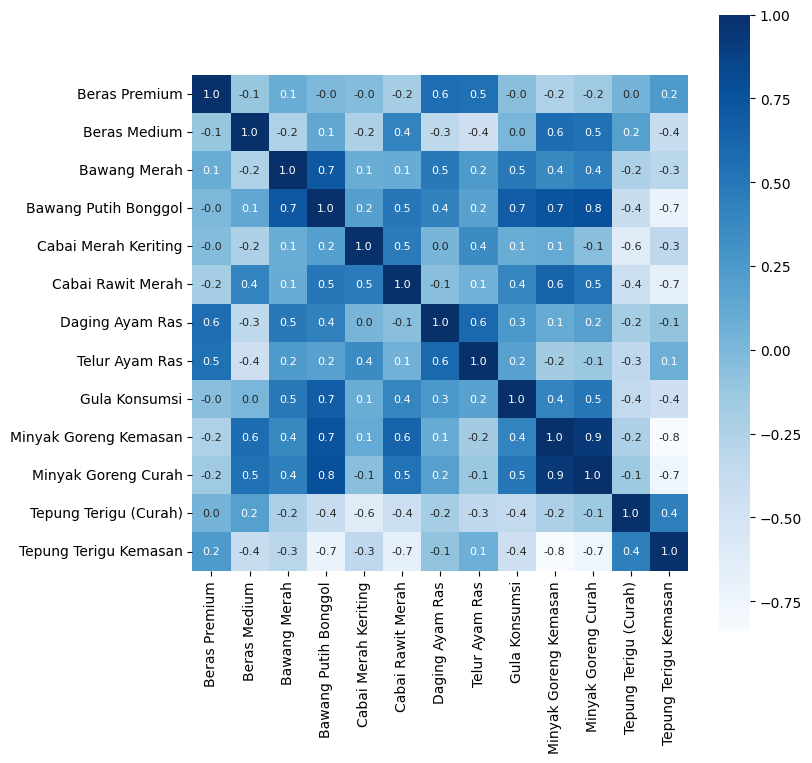

In [16]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [17]:
# correlation values of Beras Medium
print(correlation['Beras Medium'])

Beras Premium           -0.114450
Beras Medium             1.000000
Bawang Merah            -0.237683
Bawang Putih Bonggol     0.134858
Cabai Merah Keriting    -0.233446
Cabai Rawit Merah        0.411472
Daging Ayam Ras         -0.328094
Telur Ayam Ras          -0.441246
Gula Konsumsi            0.015006
Minyak Goreng Kemasan    0.564156
Minyak Goreng Curah      0.535727
Tepung Terigu (Curah)    0.198194
Tepung Terigu Kemasan   -0.386136
Name: Beras Medium, dtype: float64


In [18]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Menghapus kolom tanggal untuk analisis numerik
numerical_data = bapok_data.drop(columns=['Tanggal'])

# Mengisi nilai kosong (jika ada) dengan median
numerical_data = numerical_data.fillna(numerical_data.median(numeric_only=True))

# Pisahkan fitur dan target
X = numerical_data.drop(columns=['Beras Medium'])
y = numerical_data['Beras Medium']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Terapkan LassoCV dengan validasi silang
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_scaled, y)

# Ambil koefisien dari model terbaik
lasso_coef = pd.Series(lasso_cv.coef_, index=X.columns)
print("Alpha optimal yang dipilih LassoCV:", lasso_cv.alpha_)
print("Koefisien Lasso:\n", lasso_coef)

# Tampilkan fitur yang dipilih (koefisien tidak nol)
selected_features = lasso_coef[lasso_coef != 0].index
print("Fitur yang dipilih oleh LassoCV:", selected_features)

Alpha optimal yang dipilih LassoCV: 28.29358740243938
Koefisien Lasso:
 Beras Premium            130.621099
Bawang Merah            -161.325500
Bawang Putih Bonggol      -0.000000
Cabai Merah Keriting    -106.447083
Cabai Rawit Merah         94.552692
Daging Ayam Ras         -149.386368
Telur Ayam Ras           -59.853347
Gula Konsumsi             -0.000000
Minyak Goreng Kemasan    283.726627
Minyak Goreng Curah       79.951046
Tepung Terigu (Curah)     48.646898
Tepung Terigu Kemasan     -0.000000
dtype: float64
Fitur yang dipilih oleh LassoCV: Index(['Beras Premium', 'Bawang Merah', 'Cabai Merah Keriting',
       'Cabai Rawit Merah', 'Daging Ayam Ras', 'Telur Ayam Ras',
       'Minyak Goreng Kemasan', 'Minyak Goreng Curah',
       'Tepung Terigu (Curah)'],
      dtype='object')


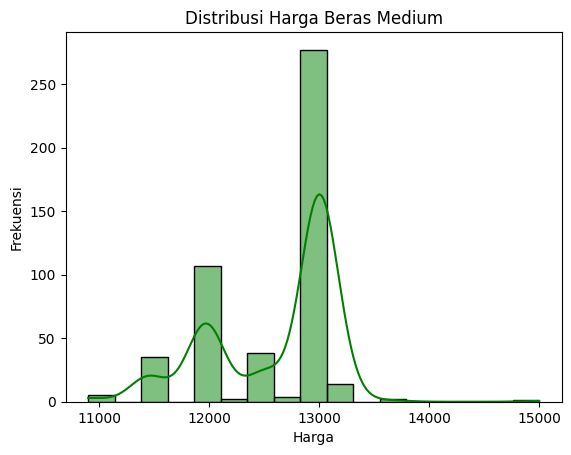

In [19]:
sns.histplot(bapok_data['Beras Medium'], color='green', kde=True)
plt.title('Distribusi Harga Beras Medium')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

In [20]:
X = bapok_data[selected_features]
Y = bapok_data['Beras Medium']

In [21]:
print(X)

     Beras Premium  Bawang Merah  Cabai Merah Keriting  Cabai Rawit Merah  \
0          14000.0       28500.0               41000.0            70000.0   
1          14000.0       28500.0               55000.0            66000.0   
2          14000.0       31000.0               51000.0            58500.0   
3          14000.0       28870.0               47920.0            51570.0   
4          14000.0       31500.0               43500.0            42500.0   
..             ...           ...                   ...                ...   
480        15375.0       39222.0               41111.0            51333.0   
481        15375.0       38333.0               39444.0            46667.0   
482        15375.0       39000.0               39667.0            46667.0   
483        15375.0       37222.0               38556.0            46444.0   
484        15000.0       30667.0               20000.0            28333.0   

     Daging Ayam Ras  Telur Ayam Ras  Minyak Goreng Kemasan  \
0           

In [22]:
print(Y)

0      11950.0
1      11950.0
2      11950.0
3      12450.0
4      11950.0
        ...   
480    13000.0
481    13000.0
482    13000.0
483    13000.0
484    13000.0
Name: Beras Medium, Length: 485, dtype: float64


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training:
Random Forest Regressor

In [24]:
model = RandomForestRegressor(n_estimators=100)

In [25]:
# training the model
model.fit(X_train,Y_train)

RandomForestRegressor()

In [26]:
# prediction on Test Data
test_data_prediction = model.predict(X_test)

In [27]:
print(test_data_prediction)

[13000.         13000.         13000.         11950.
 13000.         13438.03142857 13000.         13007.5
 12101.85714286 11977.5        13000.         12987.5
 12511.96428571 13000.         12221.89285714 12462.42857143
 11119.5        12500.         13000.         11936.
 13000.         11994.         11944.5        13000.
 13000.         11989.         12493.5        13004.75714286
 11992.         11774.5        13000.         12110.42857143
 11962.5        13000.         11450.         12123.
 13000.         12162.5        13000.         12422.92857143
 13000.         12403.5        13000.         11928.5
 13000.         13000.         11935.         13000.
 13000.         11792.5        13000.         13000.
 13000.         13000.         13000.         13000.
 13000.         13000.         11747.         12010.96428571
 11967.5        13075.         12478.42857143 13000.
 13000.         12269.         13000.         12414.
 13000.         12461.89285714 13000.         11999.5
 1

In [28]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9243613091825246


Compare the Actual Values and Predicted Values in a Plot

In [29]:
Y_test = list(Y_test)

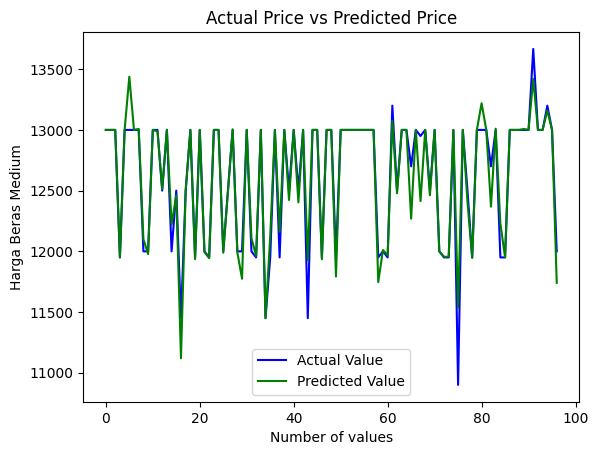

In [30]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Harga Beras Medium')
plt.legend()
plt.show()

In [31]:
import joblib

# Simpan model dan scaler
joblib.dump(model, 'prediksi_model.pkl')
joblib.dump(scaler, 'prediksi_scaler.pkl')
joblib.dump(selected_features.tolist(), 'selected_features.pkl')

['selected_features.pkl']

In [32]:
import joblib

# Load kembali model dan scaler
model = joblib.load('prediksi_model.pkl')
scaler = joblib.load('prediksi_scaler.pkl')
selected_features = joblib.load('selected_features.pkl')

In [33]:
import pandas as pd

new_data = pd.read_csv("Template_Data_Baru.csv")

# Isi nilai kosong
new_data = new_data.fillna(new_data.median(numeric_only=True))

# Filter fitur sesuai dengan yang dipilih saat pelatihan
new_data_selected = new_data[selected_features]

# Lakukan prediksi
prediction = model.predict(new_data_selected)

# Buat DataFrame hasil prediksi
df_prediction = pd.DataFrame(prediction, columns=["Prediksi Harga Beras Medium"])

print(df_prediction)

   Prediksi Harga Beras Medium
0                      12057.5
1                      12095.0
